In [41]:
import numpy as np

n = 100
d = 50
mu = np.zeros(d)
X = np.random.multivariate_normal(mu, np.identity(d), n)
print(X)


[[-0.0310397   1.60989483 -1.1638781  ...  0.62731982 -0.22976606
   1.12907154]
 [ 0.66695355 -0.11684176 -1.00314822 ... -3.8055868  -0.17674532
  -0.36988932]
 [-1.1938651   1.71167004 -0.60354708 ...  1.38806232  0.99066033
  -1.35305066]
 ...
 [-0.84145951 -0.58761738  1.10179364 ...  0.93708679  0.12005045
  -1.35346474]
 [ 0.44876733  0.40279035 -0.13426055 ...  1.8071947  -1.55799538
   0.87676779]
 [ 0.23393168  1.36241099 -0.31562908 ... -0.25279875 -0.48931349
   1.00398223]]


In [42]:
# Create epsilon vector

epsilon = np.random.chisquare(1, n) - 1  # Centered Chi-square distribution

# Define parameter

theta_star = np.array([10, 5, -3, -2, -1] + [0] * (d - 5))

# Create vector Y
Y = X @ theta_star + epsilon

print(epsilon)
print(X.shape)
print(theta_star.shape)
print(epsilon.shape)
print(Y.shape)
print(Y)


[-0.08236723  0.71074754 -0.9367428  -0.64314934 -0.9993037  -0.02619467
 -0.84327758 -0.37228996  0.99186016 -0.93719089 -0.82709332  0.27824905
  0.24599243  0.2863511  -0.93967211  1.72823841  5.34559604 -0.66598335
 -0.98898943 -0.89920477 -0.9755981  -0.99187155 -0.84505474 -0.04819293
 -0.36132094 -0.60620499  2.52655395 -0.60815078  0.78150101 -0.99883456
  0.60222253 -0.99824063  6.73836571 -0.36637684 -0.92631197 -0.94549944
  1.17836436 -0.53388277 -0.5401919  -0.28245026 -0.84357808 -0.16255531
 -0.91736838  0.41808076 -0.9345829  -0.83784719 -0.99257851 -0.88227102
 -0.0795767   2.06972468  0.89915304 -0.82225607 -0.78582714 -0.95749506
  0.56053259  1.09341519 -0.52333697 -0.74827353  5.08841401 -0.86387104
 -0.99926056 -0.71231119 -0.86729226 -0.7657672  -0.48836261  2.95549793
  0.49841665 -0.73685573  0.32930098 -0.70615636 -0.95830858 -0.89664907
 -0.95754723  0.09789186 -0.99919376 -0.91339576 -0.9902031   1.1670679
  2.92598826  7.37772602  2.6639668  -0.45684658 -0.

Influential variables are the non-zero coefficients in θ* (first five elements)



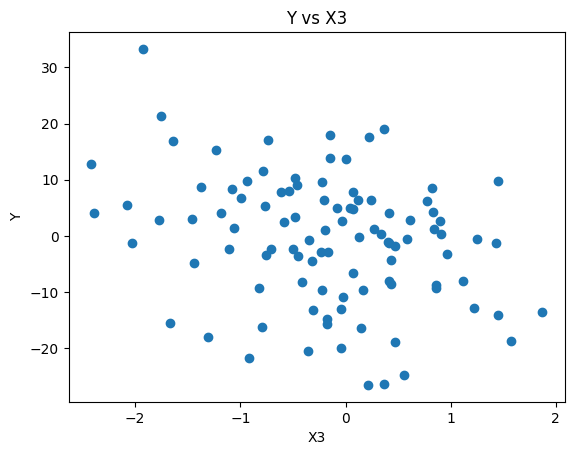

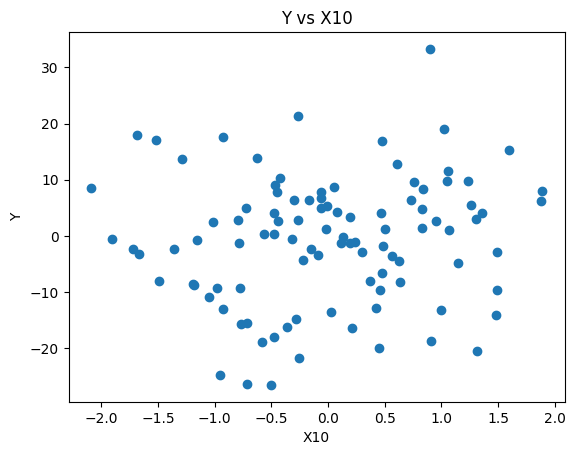

In [20]:
# Graphs

import matplotlib.pyplot as plt

plt.scatter(X[:, 2], Y)  # Y vs X3
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Y vs X3')
plt.show()

plt.scatter(X[:, 9], Y)  # Y vs X10
plt.xlabel('X10')
plt.ylabel('Y')
plt.title('Y vs X10')
plt.show()


The first graph shows a barely noticeable relationship between the corresponding values from 𝑋 (specifically 𝑋3) and 𝑌. Notice that 𝜃⋆ has only the first 5 values different from 0. Therefore, in the second graph, we can't see a clear relationship between 𝑋 and 𝑌 because 𝑋10 has a coefficient of 0 in 𝜃⋆. This means 𝑋10 does not influence 𝑌, resulting in a more scattered and less linear plot.

In [ ]:
# exercise B:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, Y)
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 9.71427367  4.90202915 -2.73560333 -1.97888872 -1.26855682 -0.10896646
 -0.08816187 -0.16702797 -0.01982798  0.058319   -0.36064238 -0.15805104
 -0.12603858  0.21240939  0.22578242  0.09248591  0.05781488  0.07439402
  0.14448555 -0.09289098  0.08389685  0.28183936  0.32743219 -0.36584586
  0.15688095 -0.02418726 -0.07737872 -0.02161949  0.09357937 -0.02629974
 -0.27458562 -0.01005695 -0.13605832 -0.24288261 -0.05829183  0.13388684
  0.34653106  0.03974906  0.02424089 -0.14991574  0.07612349  0.39866965
  0.18409812  0.10906656 -0.12674999 -0.0546677  -0.07592352  0.06853543
  0.41235685  0.0957217 ]
Intercept: -0.04571351149784997


Given that the true parameter vector θ* has non-zero values only in its first five components (10, 5, -3, -2, -1) and zeros in the rest, the largest estimated coefficients should approximately align with those five positions (9, 4, -2,-1,-1), indicating that they are the influential variables.

In [5]:
# Rank of Design Matrix:

rank = np.linalg.matrix_rank(X)
print("Rank of the design matrix X:", rank)


Rank of the design matrix X: 50


The matrix is full rank so all its characteristics are linearly independent of each other

In [6]:
# Quadratic Risk Function

def quadratic_risk(theta_hat, theta_star):
    return np.sum((theta_hat - theta_star) ** 2)

theta_hat = model.coef_
risk = quadratic_risk(theta_hat, theta_star)
print("Quadratic Risk:", risk)


Quadratic Risk: 1.7059261219139896


In [7]:
# Reproduce steps with different mu values:

mu_new = np.array([0] * 5 + [10] * (d-5))
X_new = np.random.multivariate_normal(mu_new, np.identity(d), n)
Y_new = X_new @ theta_star + epsilon

model.fit(X_new, Y_new)
new_coefficients = model.coef_
print("New Coefficients:", new_coefficients)


New Coefficients: [ 1.01088160e+01  5.29494828e+00 -2.97809667e+00 -2.09700441e+00
 -1.01509864e+00  2.30828803e-01 -1.96334112e-01  3.75021449e-02
  7.13501453e-02 -3.54182959e-01  1.94760373e-01  1.53707511e-01
 -4.13010912e-02 -3.10606577e-01 -1.67690204e-01 -8.65144289e-02
 -1.95270700e-01  3.68983980e-01 -1.31350523e-01  5.27023446e-01
  3.04097792e-02 -1.43253875e-01  3.21220941e-01 -2.22120493e-01
 -2.47485279e-01  3.22697600e-01 -1.33733534e-01 -9.72161871e-02
  1.21710007e-01 -1.76971591e-02  2.77165265e-01  1.55073638e-01
 -2.49065407e-01 -2.45905050e-01 -8.33107674e-03  2.36768781e-02
 -1.00313510e-01 -2.86220164e-01  8.03935040e-02  9.18888534e-02
  1.57475078e-02 -2.23746354e-01  1.91152691e-01 -9.19434507e-02
  1.55725346e-02  9.47529999e-02 -9.43463009e-02  8.18534027e-03
  1.84685896e-01  4.11395753e-02]


The coefficients for the features where the mean was set to 10 (features 6 through 50) have values that are much smaller in magnitude, often close to zero (e.g., 0.072, -0.059, -0.073, etc.). This suggests that, due to the modification of the means of these features, the estimated coefficients for these features are less significant. Since the corresponding values of θ* for these variables were set to 0, the model correctly identifies their minimal influence on the output Y.

On the other hand, the first few coefficients  are relatively close to the true values of θ* = [10, 5, -3, -2, -1].
These results indicate that the model is correctly identifying the major influencing variables and their approximate magnitudes.

In [8]:
d = 200
theta_star_200 = np.array([10, 5, -3, -2, -1] + [0] * (d - 5))
X_200 = np.random.multivariate_normal(np.zeros(d), np.identity(d), n)
Y_200 = X_200 @ theta_star_200 + epsilon

model.fit(X_200, Y_200)
coefficients_200 = model.coef_
print("Coefficients for d=200:", coefficients_200)
rank_200 = np.linalg.matrix_rank(X_200)
print("Rank of the design matrix X for d=200:", rank_200)


Coefficients for d=200: [ 5.15960821e+00  2.96494031e+00 -1.47770294e+00 -6.12449486e-01
 -4.25781354e-01  1.08380317e-01  5.21088736e-01  4.47399040e-01
  8.39897470e-01 -3.53099443e-01  2.50560114e-01  1.05855781e+00
 -1.62410217e-01 -4.44001028e-01  4.67423830e-01 -3.78295013e-01
 -1.07971811e+00 -3.77815018e-01 -1.86592590e-01 -5.19635322e-01
 -1.24257207e-01 -4.00437825e-01  6.38866280e-02 -4.66473054e-01
  8.52167114e-01  3.33914261e-01 -7.26881547e-01  4.28174014e-01
  5.41199431e-01 -2.84427082e-01 -1.27465954e-01 -2.62073068e-01
 -3.41401544e-01 -1.86609029e-01 -2.80190509e-02 -4.71195042e-01
  5.06940547e-02 -4.08539231e-02  4.42946083e-01 -6.60909087e-02
  6.75070107e-01  4.06813896e-01 -3.50744577e-01 -2.87690382e-01
 -5.94150882e-01 -2.47751708e-01  1.13064590e-01 -3.19494493e-01
  4.08445037e-01  5.81348217e-01 -3.79655078e-01  1.69064848e-01
  8.55523437e-01 -4.17605778e-01 -5.83166967e-01 -2.84593123e-01
  2.39967801e-02 -3.31986097e-01 -3.93676705e-01  8.56379360e-01
 

The large number of features (200) introduces more noise, which can result in slight overfitting or instability in the coefficients. As a result, some coefficients might fluctuate around zero even for features with no true effect. This can lead to higher variance in the estimated coefficients. The estimated coefficients show a more varied spread, with values ranging from large positive to large negative numbers. This reflects the increased complexity of the design matrix when the number of features grows. With 𝑑=200 and 𝑛=100, the matrix 𝑋 does not have a full rank of 200, limiting it to 100. This leads to multicollinearity issues and more unstable estimators due to the many columns and relatively few observations.


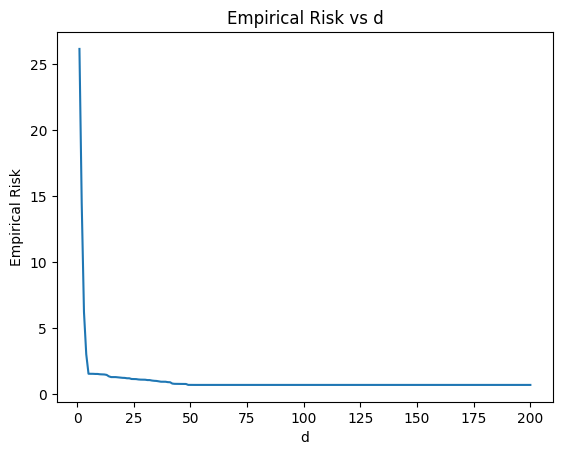

In [9]:
# C:

def empirical_risk(X, Y, theta_hat):
    return np.mean((Y - X @ theta_hat) ** 2)

risks = []
for d in range(1, 201):
    X_d = X[:, :d]
    model.fit(X_d, Y)
    theta_hat_d = model.coef_
    risk_d = empirical_risk(X_d, Y, theta_hat_d)
    risks.append(risk_d)

plt.plot(range(1, 201), risks)
plt.xlabel('d')
plt.ylabel('Empirical Risk')
plt.title('Empirical Risk vs d')
plt.show()


By analyzing the resulting graph, we can observe how the empirical risk varies as the number of variables d increases.

Initially, by adding relevant variables (the first 5 with non-zero coefficients), the empirical risk decreases significantly because the model better captures the underlying relationship between  X  and Y.

After the first 5 variables, adding irrelevant variables (with zero coefficients) may slightly decrease the empirical risk due to the inclusion of noise, but it can eventually stabilize or even increase if too many irrelevant variables are added, leading to overfitting.

This highlights the importance of appropriately selecting the number of variables to balance the model fit and avoid overfitting.


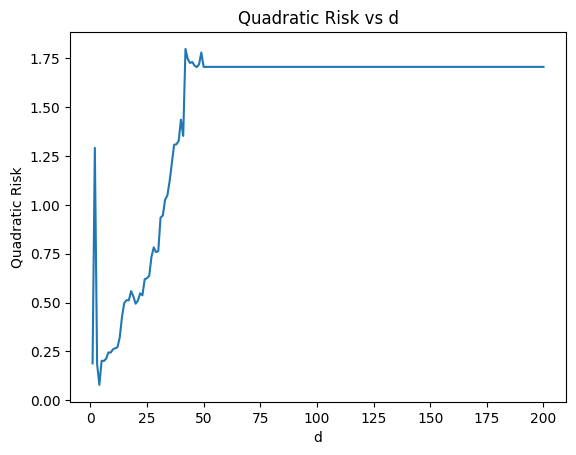

In [10]:
quadratic_risks = []
for d in range(1, 201):
    X_d = X[:, :d]
    model.fit(X_d, Y)
    theta_hat_d = model.coef_
    risk_d = quadratic_risk(theta_hat_d, theta_star[:d])
    quadratic_risks.append(risk_d)

plt.plot(range(1, 201), quadratic_risks)
plt.xlabel('d')
plt.ylabel('Quadratic Risk')
plt.title('Quadratic Risk vs d')
plt.show()


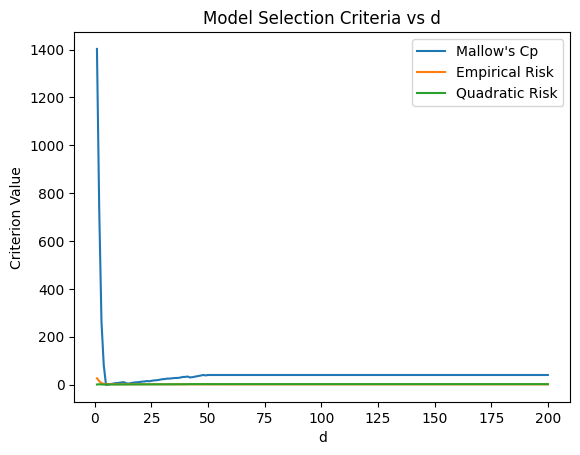

In [11]:
def mallow_cp(X, Y, theta_hat, sigma_squared):
    n, d = X.shape
    rss = np.sum((Y - X @ theta_hat) ** 2)
    return rss / sigma_squared - n + 2 * d

sigma_squared = np.var(epsilon)
cp_values = []
for d in range(1, 201):
    X_d = X[:, :d]
    model.fit(X_d, Y)
    theta_hat_d = model.coef_
    cp_d = mallow_cp(X_d, Y, theta_hat_d, sigma_squared)
    cp_values.append(cp_d)

plt.plot(range(1, 201), cp_values, label="Mallow's Cp")
plt.plot(range(1, 201), risks, label='Empirical Risk')
plt.plot(range(1, 201), quadratic_risks, label='Quadratic Risk')
plt.xlabel('d')
plt.ylabel('Criterion Value')
plt.title('Model Selection Criteria vs d')
plt.legend()
plt.show()


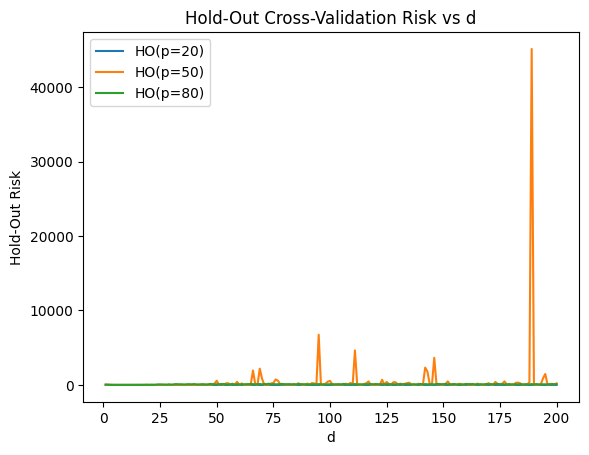

In [12]:
from sklearn.model_selection import train_test_split

def hold_out_cv(X, Y, p):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=p/n)
    model.fit(X_train, Y_train)
    theta_hat = model.coef_
    return empirical_risk(X_test, Y_test, theta_hat)

ho_risks_20 = [hold_out_cv(X[:, :d], Y, 20) for d in range(1, 201)]
ho_risks_50 = [hold_out_cv(X[:, :d], Y, 50) for d in range(1, 201)]
ho_risks_80 = [hold_out_cv(X[:, :d], Y, 80) for d in range(1, 201)]

plt.plot(range(1, 201), ho_risks_20, label='HO(p=20)')
plt.plot(range(1, 201), ho_risks_50, label='HO(p=50)')
plt.plot(range(1, 201), ho_risks_80, label='HO(p=80)')
plt.xlabel('d')
plt.ylabel('Hold-Out Risk')
plt.title('Hold-Out Cross-Validation Risk vs d')
plt.legend()
plt.show()



By analyzing the HO(p) graph for different values of p:

### Impact of p Size:
- As p (test set size) increases, the HO(p) error tends to stabilize because the model is evaluated on a more representative test set.
- For smaller values of p, the error can be more volatile due to the lower representativeness of the test set.

### Relationship with the Number of Variables:
- Similar to previous metrics, the HO(p) error decreases when adding relevant variables and can adjust when adding irrelevant variables.
- The HO(p) curve can help identify the optimal model complexity by balancing generalization ability and fit.

### Comparison between Different p Values:
- Models evaluated with larger p values tend to show a more stable estimation of cross-validation error, which can be more reliable for model selection.
- The variability in errors for different p values provides information about the model's robustness against different test set sizes.


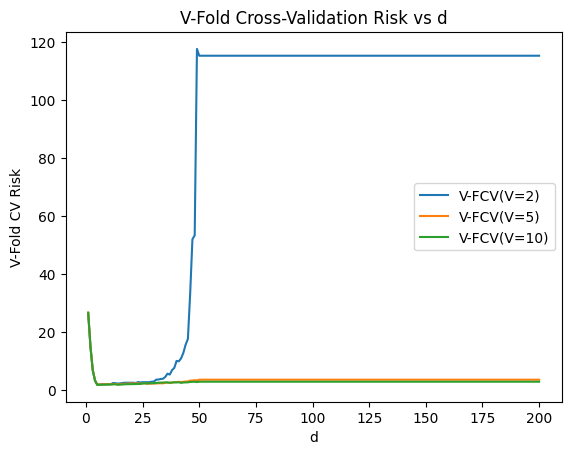

In [13]:
from sklearn.model_selection import cross_val_score

def v_fold_cv(X, Y, V):
    model = LinearRegression(fit_intercept=True)
    scores = cross_val_score(model, X, Y, cv=V, scoring='neg_mean_squared_error')
    return -np.mean(scores)

vcv_risks_2 = [v_fold_cv(X[:, :d], Y, 2) for d in range(1, 201)]
vcv_risks_5 = [v_fold_cv(X[:, :d], Y, 5) for d in range(1, 201)]
vcv_risks_10 = [v_fold_cv(X[:, :d], Y, 10) for d in range(1, 201)]

plt.plot(range(1, 201), vcv_risks_2, label='V-FCV(V=2)')
plt.plot(range(1, 201), vcv_risks_5, label='V-FCV(V=5)')
plt.plot(range(1, 201), vcv_risks_10, label='V-FCV(V=10)')
plt.xlabel('d')
plt.ylabel('V-Fold CV Risk')
plt.title('V-Fold Cross-Validation Risk vs d')
plt.legend()
plt.show()



By analyzing the V-fold Cross-Validation graph for different values of V:

### Impact of the Number of Folds (V):
- **Smaller values of V (e.g., V=2)**: Show greater variability in V-FCV errors because each fold contains a larger proportion of the training and test data.
- **Larger values of V (e.g., V=10)**: Tend to provide a more stable and accurate estimate of the validation error, as each fold is smaller and the data partitioning is more balanced.

### Relationship with the Number of Variables (d):
- Similar to other cross-validation metrics, the V-FCV error decreases when adding relevant variables and can stabilize or increase when incorporating irrelevant variables.

### Comparison between Different V Values:
- The V-FCV error curves for different values of V show similar trends in behavior concerning the number of variables.
- However, the absolute error values may vary slightly depending on V, being more consistent with V=10 due to the larger number of folds and, therefore, better error estimation.
